In [48]:
import nltk
import pandas as pd 
import numpy as np 
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as  plt 


In [2]:
df = pd.read_csv('Data/Dataset.csv',encoding='latin-1')
df.head()

C:\Users\Ranjit\AppData\Local\Temp\ipykernel_16732\468808541.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/Dataset.csv',encoding='latin-1')


,Product_name,Price,Rate,Review,Summary
0,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Simply awesome,it's really worth every single penny. it works...
1,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Fabulous!,Delivery was delayed by two days except this e...
4,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Nice product,A Good cooler by Crompton. The height of the c...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363261 entries, 0 to 363260
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Product_name  363246 non-null  object
 1   Price         363245 non-null  object
 2   Rate          363245 non-null  object
 3   Review        363239 non-null  object
 4   Summary       361239 non-null  object
dtypes: object(5)
memory usage: 13.9+ MB


In [4]:
no_of_duplicates = df.duplicated().sum()
no_of_duplicates

52466

In [5]:

df.drop_duplicates(inplace=True)
print(f"Remove { no_of_duplicates} Duplicate Records")

Remove 52466 Duplicate Records


In [6]:
price_column = df['Price']
def extract_int(val):
    try:
        return int(''.join(list(filter(str.isdigit,val)))) 
    except Exception as e:
        return None

df['Price'] = df['Price'].apply(extract_int)
print('we have succesfully transformed our price column')

we have succesfully transformed our price column


In [7]:
#impurity inside this column
df['Rate'].value_counts()

Rate
5                                                              127656
4                                                               45907
5.0                                                             43670
1                                                               27588
3                                                               21685
4.0                                                             15037
1.0                                                             10372
2                                                                9133
3.0                                                              6548
2.0                                                              3193
Pigeon Favourite Electric Kettle????(1.5 L, Silver, Black)          1
product_name                                                        1
Bajaj DX 2 L/W Dry Iron                                             1
Nova Plus Amaze NI 10 1100 W Dry Iron????(Grey & Turquoise)         1
Name: count, dt

In [8]:
# there is some impure values
df['Rate'].value_counts().index

Index([                                                          '5',
                                                                 '4',
                                                                 5.0,
                                                                 '1',
                                                                 '3',
                                                                 4.0,
                                                                 1.0,
                                                                 '2',
                                                                 3.0,
                                                                 2.0,
        'Pigeon Favourite Electric Kettle????(1.5 L, Silver, Black)',
                                                      'product_name',
                                           'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron????(Grey & Turquoise)'],
      dtype='object

In [9]:
# To remove impure records from your dataset
lst = [
    'Pigeon Favourite Electric Kettle????(1.5 L, Silver, Black)',
                                                      'product_name',
                                           'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron????(Grey & Turquoise)'
]
#impure records
no_of_records_before_removed = df.shape[0]
df.drop(df[df['Rate'].isin(lst)].index,inplace=True)
print(f"No of row deleted {no_of_records_before_removed - df.shape[0]}")

No of row deleted 4


In [10]:
df['Rate'].value_counts()

Rate
5      127656
4       45907
5.0     43670
1       27588
3       21685
4.0     15037
1.0     10372
2        9133
3.0      6548
2.0      3193
Name: count, dtype: int64

In [11]:
# To convert the data type of Rate columns
df['Rate'] = df['Rate'].astype('float')

In [12]:
df.dtypes

Product_name     object
Price           float64
Rate            float64
Review           object
Summary          object
dtype: object

In [13]:
# To count no. missing value in the column
no_of_records_with_miss = df.shape[0]
print("no of records with missing value ",no_of_records_with_miss)
df.isnull().sum()

no of records with missing value  310791


Product_name       1
Price              2
Rate               2
Review             8
Summary         1495
dtype: int64

In [14]:
df.dropna(inplace=True)
print(f"no of records after removed missing values {df.shape[0]}")

no of records after removed missing values 309292


In [15]:
# Now we have successfully removed missing value
df.isnull().sum()

Product_name    0
Price           0
Rate            0
Review          0
Summary         0
dtype: int64

In [16]:
df.head()

,Product_name,Price,Rate,Review,Summary
0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,5.0,Simply awesome,it's really worth every single penny. it works...
1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,4.0,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,5.0,Worth every penny,GREAT packaging by seller. As this was the mos...
3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,5.0,Fabulous!,Delivery was delayed by two days except this e...
4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,4.0,Nice product,A Good cooler by Crompton. The height of the c...


In [17]:
# Make a single column with Review + Summary
df['review_with_summary'] = df['Review'] + " "+ df['Summary']

In [18]:
df.head()


,Product_name,Price,Rate,Review,Summary,review_with_summary
0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,5.0,Simply awesome,it's really worth every single penny. it works...,Simply awesome it's really worth every single ...
1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,4.0,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...,Worth the money . Desert Cooler live up to the...
2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,5.0,Worth every penny,GREAT packaging by seller. As this was the mos...,Worth every penny GREAT packaging by seller. A...
3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,5.0,Fabulous!,Delivery was delayed by two days except this e...,Fabulous! Delivery was delayed by two days exc...
4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,4.0,Nice product,A Good cooler by Crompton. The height of the c...,Nice product A Good cooler by Crompton. The he...


### Text Processing

In [19]:
punctuation_lst = string.punctuation
punctuation_lst

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
lst_of_stopwords = stopwords.words('english')
lst_of_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [44]:
stemmer = PorterStemmer()

In [45]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[.*?]', '', text)
    text = re.sub('https?://S+|www.S+', '', text)
    # text = re.sub('+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('n', '', text)
    text = re.sub('w*dw*', '', text)
    text = [word for word in text.split(' ') if word not in lst_of_stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
# data["Review"] = data["Review"].apply(clean)

In [50]:
# Now we are applying text processing on our text column
df['clean_review_with_summary'] = df['review_with_summary'].apply(clean)

In [51]:
df.head()

,Product_name,Price,Rate,Review,Summary,review_with_summary,clean_review_with_summary
0,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,5.0,Simply awesome,it's really worth every single penny. it works...,Simply awesome it's really worth every single ...,simpli awesom realli worth everi sigl pey work...
1,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,4.0,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...,Worth the money . Desert Cooler live up to the...,worth moey esert cooler live ame bought crom...
2,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,5.0,Worth every penny,GREAT packaging by seller. As this was the mos...,Worth every penny GREAT packaging by seller. A...,worth everi pey great packagig seller importat...
3,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,5.0,Fabulous!,Delivery was delayed by two days except this e...,Fabulous! Delivery was delayed by two days exc...,fabul eliveri elay two ay except everythig qui...
4,"Crompton 75 L Desert Air Cooler??(White, Tea...",10499.0,4.0,Nice product,A Good cooler by Crompton. The height of the c...,Nice product A Good cooler by Crompton. The he...,ice prouct goo cooler crompto height cooler 3f...


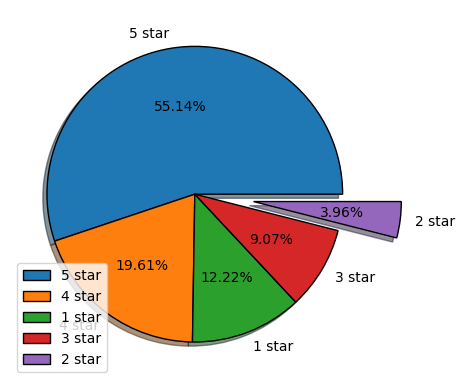

In [98]:
# Lowest rating for 2 start
label = [str(int(i))+' '+'star' for i in list(df['Rate'].value_counts().index)]
no_of_count = list(df['Rate'].value_counts().values)
no_of_count
plt.pie(no_of_count,labels=label,autopct="%2.2f%%",shadow=True,explode=[0,0,0,0,0.4],wedgeprops={'edgecolor':'k'})
plt.legend()
plt.savefig('lowest_star_rate.png')
plt.show()

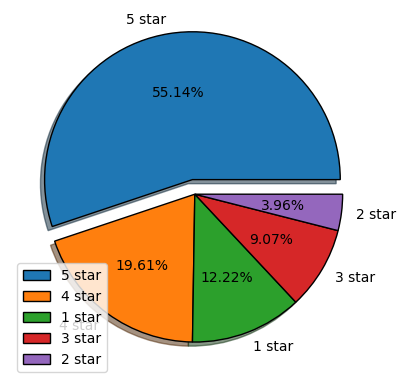

In [97]:
# Lowest rating for 2 start
label = [str(int(i))+' '+'star' for i in list(df['Rate'].value_counts().index)]
no_of_count = list(df['Rate'].value_counts().values)
no_of_count
plt.pie(no_of_count,labels=label,autopct="%2.2f%%",shadow=True,explode=[0.1,0,0,0,0],wedgeprops={'edgecolor':'k'})
plt.legend()
plt.savefig('highest_star_rating.png')
plt.show()

In [92]:
# df

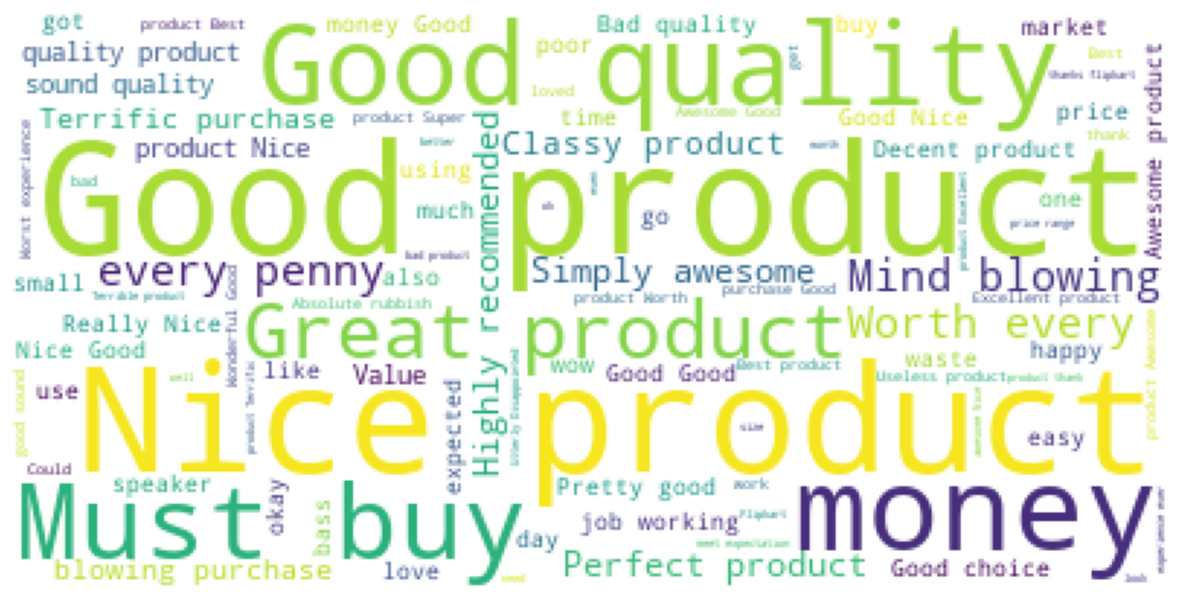

In [96]:
# Generating wordcloud from the text
text = " ".join(i for i in df.review_with_summary)
stopwords = set(lst_of_stopwords)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

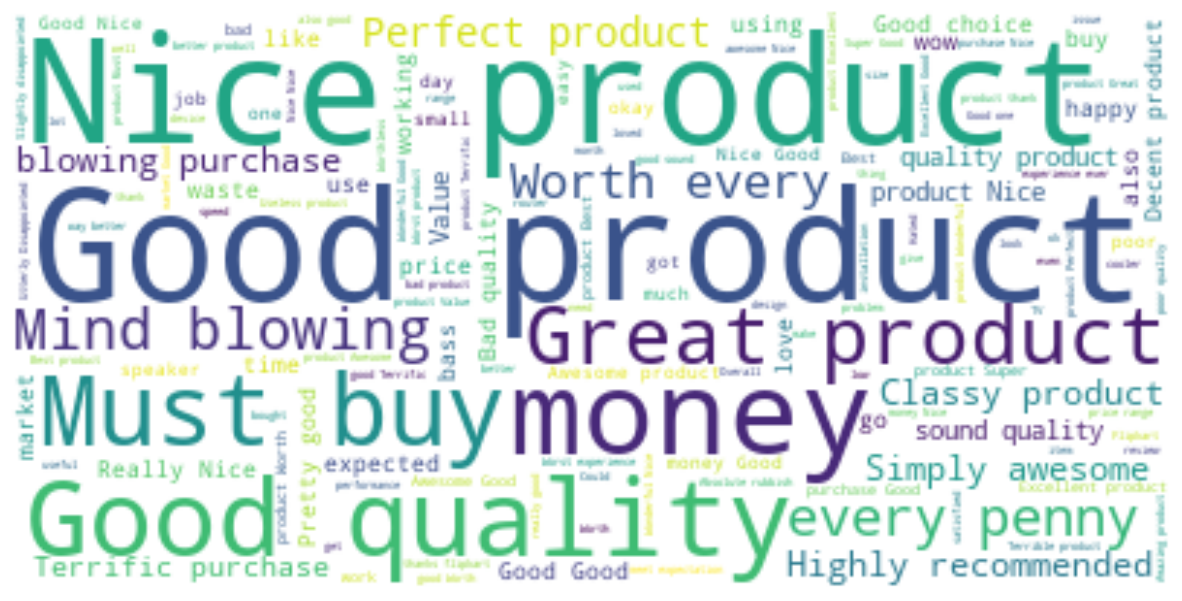

In [95]:
# Generating wordcloud from the text
text = " ".join(i for i in df.review_with_summary)
stopwords = set(lst_of_stopwords)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()